In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-farm-distracted-driver-detection/sample_submission.csv
/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_96590.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_32366.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_99675.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_85937.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_73903.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_89410.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_70462.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_45622.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_55507.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_34204.jpg
/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_16279.jpg
/kag

In [3]:
!pip install split-folders

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [5]:
import splitfolders


In [7]:
import os

In [8]:
!pip install pillow

In [12]:
from PIL import Image


In [13]:
#read a CSV file and store its contents in a DataFrame
df= pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv")
df.head()

subject classname            img
0    p002        c0  img_44733.jpg
1    p002        c0  img_72999.jpg
2    p002        c0  img_25094.jpg
3    p002        c0  img_69092.jpg
4    p002        c0  img_92629.jpg

In [14]:
df.shape

(22424, 3)

In [15]:
#create a histogram plot of the df
import plotly.express as px

px.histogram(df , x="classname" ,  color="classname", title="Images By Categories ")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subject    22424 non-null  object
 1   classname  22424 non-null  object
 2   img        22424 non-null  object
dtypes: object(3)
memory usage: 525.7+ KB


In [19]:
#Splitting data into train, validation and test in ratio 0.7 ,0.15, 0.15
mydata = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
splitfolders.ratio(mydata, output="mydata",
    seed=1337, ratio=(.7, .15, .15), group_prefix=None, move=False)

Copying files: 22424 files [03:13, 115.69 files/s]


In [21]:
train = '/kaggle/working/mydata/train'
val = '/kaggle/working/mydata/val'
test = '/kaggle/working/mydata/test'

In [22]:
class_label= {'c0': 'Safe driving',
              'c1': 'Texting - right',
              'c2': 'Talking on the phone - right', 
              'c3': 'Texting - left', 
              'c4': 'Talking on the phone - left', 
              'c5': 'Operating the radio', 
              'c6': 'Drinking', 
              'c7': 'Reaching behind', 
              'c8': 'Hair and makeup', 
              'c9': 'Talking to passenger'}

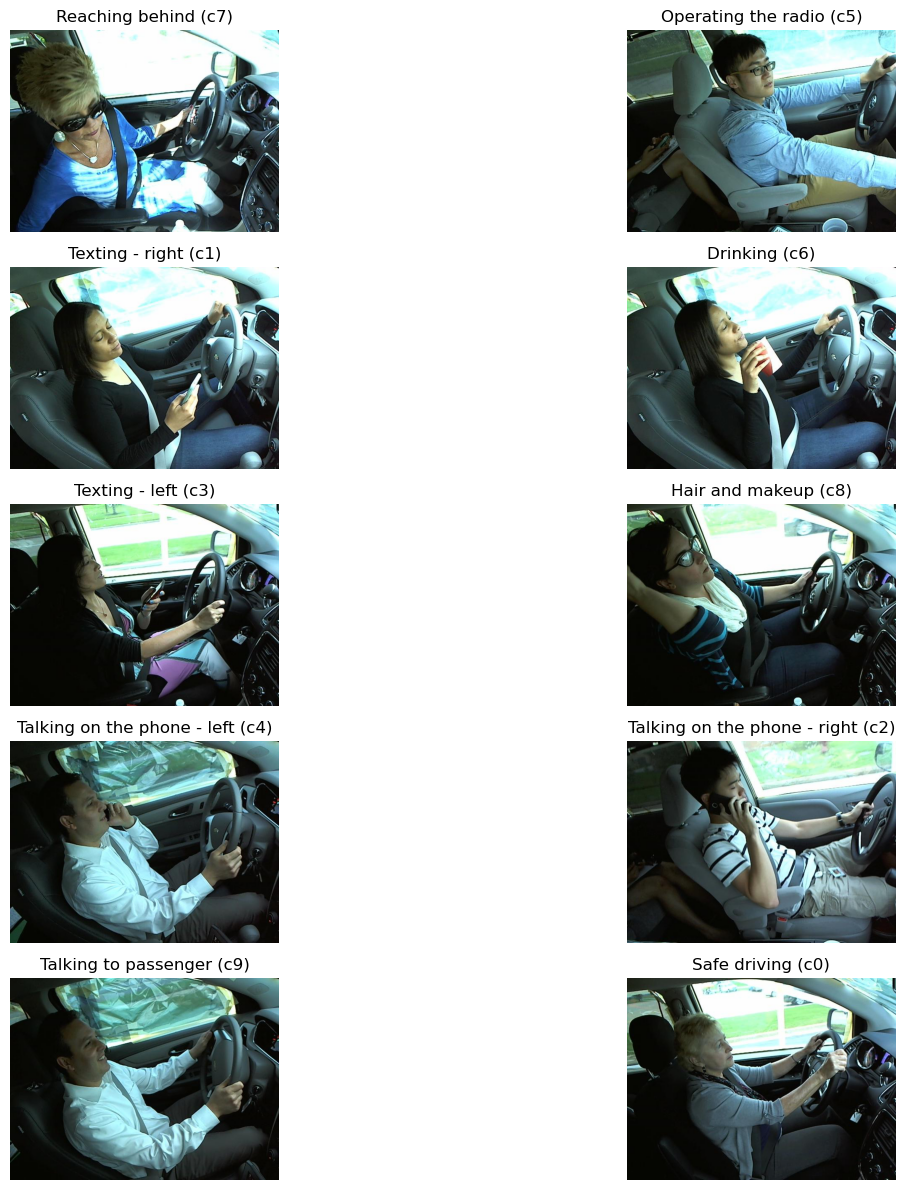

In [23]:
# fig, axs = plt.subplots(5, 2, figsize=(10,10))

subdirs = [subdir for subdir in os.listdir(train) if os.path.isdir(os.path.join(train, subdir))]

fig, axs = plt.subplots(5, 2, figsize=(16,12))

for i, subdir in enumerate(subdirs):
    file = os.listdir(os.path.join(train, subdir))[0]

    img = Image.open(os.path.join(train, subdir, file))
    axs[i//2, i%2].imshow(img)
    axs[i//2, i%2].set_title(f'{class_label[subdir]} ({subdir})')
    axs[i//2, i%2].axis('off')

plt.tight_layout()


In [24]:
#from keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)

#batch_size = 128

#train_generator = train_datagen.flow_from_directory(
       # train,
        #target_size=(256, 256),
        #batch_size=128)

#validation_generator = test_datagen.flow_from_directory(
       # val,
        #target_size=(256, 256),
       # batch_size=128)
     

**PREPROCESSING**

In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications import VGG16

In [29]:
datagen = ImageDataGenerator(
    preprocessing_function= preprocess_input,
    rotation_range=10,#range of degrees for random rotations of the images during training.
    width_shift_range=0.05,#range for randomly shifting the images horizontally during training.
    height_shift_range=0.05,#range for randomly shifting the images vertically during training.
    shear_range=0.05,#range for randomly applying shear transformations to the images during training.
    zoom_range=0.05,#range for randomly applying zoom transformations to the images during training.
   fill_mode="nearest",#fill in any empty pixels that are created during the augmentation process.
    
)

datagen_test = ImageDataGenerator(
    preprocessing_function= preprocess_input
)

In [30]:
train_generator = datagen.flow_from_directory(
        train,
        target_size=(256, 256),
        batch_size=128)

validation_generator = datagen_test.flow_from_directory(
        val,
        target_size=(256, 256),
        batch_size=128)
test_generator = datagen_test.flow_from_directory(
        test,
        target_size=(256, 256),
        batch_size=128)

Found 15692 images belonging to 10 classes.
Found 3358 images belonging to 10 classes.
Found 3374 images belonging to 10 classes.


In [31]:
conv_VGG = VGG16(
    include_top=False,#
    weights='imagenet',
    input_shape=(256, 256, 3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [33]:
conv_VGG.trainable = False

In [35]:
conv_VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [36]:
model_vgg = tf.keras.models.Sequential([
    conv_VGG,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
model_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               1

In [38]:
model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
history_vgg=model_vgg.fit(
    train_generator,
    batch_size=128,
     # steps_per_epoch=len(train)//128,
      epochs=10,
      validation_data=validation_generator)

Epoch 1/10
123/123 [==============================] - 389s 3s/step - loss: 5.3611 - accuracy: 0.2074 - val_loss: 1.6845 - val_accuracy: 0.3815
Epoch 2/10
123/123 [==============================] - 331s 3s/step - loss: 1.5346 - accuracy: 0.4822 - val_loss: 0.5999 - val_accuracy: 0.8109
Epoch 3/10
123/123 [==============================] - 328s 3s/step - loss: 0.7845 - accuracy: 0.7464 - val_loss: 0.1650 - val_accuracy: 0.9592
Epoch 4/10
123/123 [==============================] - 328s 3s/step - loss: 0.4579 - accuracy: 0.8574 - val_loss: 0.0980 - val_accuracy: 0.9720
Epoch 5/10
123/123 [==============================] - 328s 3s/step - loss: 0.3289 - accuracy: 0.9028 - val_loss: 0.0566 - val_accuracy: 0.9842
Epoch 6/10
123/123 [==============================] - 328s 3s/step - loss: 0.2529 - accuracy: 0.9271 - val_loss: 0.0517 - val_accuracy: 0.9863
Epoch 7/10
123/123 [==============================] - 328s 3s/step - loss: 0.2173 - accuracy: 0.9377 - val_loss: 0.0582 - val_accuracy: 0.9842

In [40]:
val_loss, val_acc = model_vgg.evaluate(validation_generator)
val_acc

27/27 [==============================] - 27s 989ms/step - loss: 0.0353 - accuracy: 0.9932


0.9931507110595703

In [41]:
from tensorflow.keras.applications import VGG16


model_vgg.save('vgg16_Wgt.h5')

In [43]:
import tensorflow
from tensorflow.keras.applications import VGG16
# model_vgg.save("vgg.h5")
# create new VGG16 model
##model = VGG16(weights=None)

# load saved weights
model1=tensorflow.keras.models.load_model('vgg16_Wgt.h5')

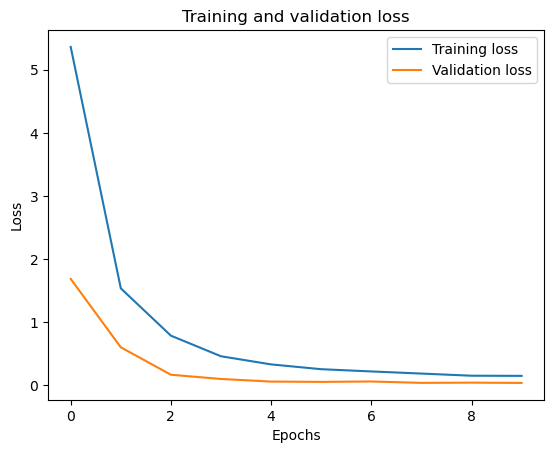

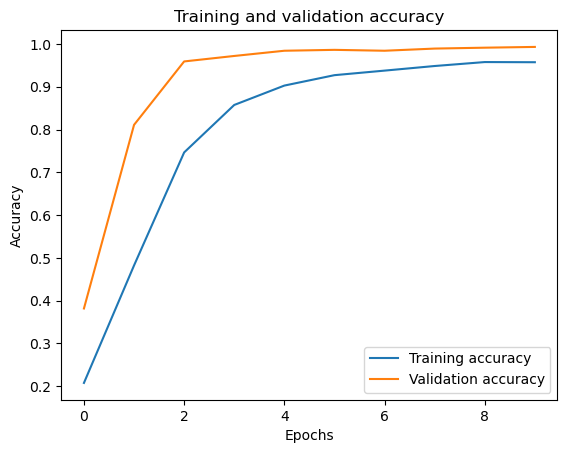

In [186]:
import matplotlib.pyplot as plt

# Plot the training and validation loss vs epochs
plt.plot(history_vgg.history['loss'], label='Training loss')
plt.plot(history_vgg.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy vs epochs
plt.plot(history_vgg.history['accuracy'], label='Training accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:
test_loss, test_acc = model_vgg.evaluate(test_generator)

print('Test accuracy:', test_acc)

27/27 [==============================] - 37s 1s/step - loss: 0.0209 - accuracy: 0.9944
Test accuracy: 0.9943686723709106


In [57]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Load image
img_path = "/kaggle/input/state-farm-distracted-driver-detection/imgs/test/img_100005.jpg"
img = load_img(img_path, target_size=(256, 256))

# Preprocess the image
# Preprocess image
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.
# Make a prediction
preds = model_vgg.predict(img_array)
class_idx = np.argmax(preds)
class_label = train_generator.class_indices
for key, value in class_label.items():
    if value == class_idx:
        predicted_class = key
        break
        
print('Predicted class:', predicted_class)


1/1 [==============================] - 0s 28ms/step
Predicted class: c7


**Data Leaking Solution - Data split on basis of Driver id**

In [2]:
import pandas as pd

driverData = pd.read_csv("/kaggle/input/state-farm-distracted-driver-detection/driver_imgs_list.csv")

In [ ]:
driverList = driverData["subject"].unique()
driverClassList = driverData["classname"].unique()

trainDriverList = driverList[:20]
testDriverList = driverList[20:]

print("trainDriverSet: ", len(trainDriverList))
print("testDriverSet: ", len(testDriverList))

In [ ]:
# Source directory containing the image files
source_directory = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'
destination_directoryTrain = '/kaggle/working/'
destination_directoryTest = '/kaggle/working/'

In [ ]:
import shutil
for i in range(driverData.shape[0]):
    if(driverData.loc[i, "subject"] in trainDriverList):
        shutil.copy(source_directory+"/"+driverData.loc[i,"classname"]+"/"+driverData.loc[i,"img"], destination_directoryTrain+driverData.loc[i,"classname"])
    else:
        shutil.copy(source_directory+"/"+driverData.loc[i,"classname"]+"/"+driverData.loc[i,"img"], destination_directoryTest+driverData.loc[i,"classname"])

In [ ]:
# Downloading the file
#import zipfile

# Specify the path of the folder you want to download
#folder_path_train = './train'
#folder_path_test = './test'

# Specify the path for the resulting ZIP file
#zip_file_path_train = 'DataWithoutLeaks_train.zip'
#zip_file_path_test = 'DataWithoutLeaks_test.zip'

# Create a ZIP archive of the folder
#shutil.make_archive(zip_file_path_train, 'zip', folder_path_train)
#shutil.make_archive(zip_file_path_test, 'zip', folder_path_test)

In [100]:
!unzip -q /kaggle/input/distracted-driver-detection-data-leaking -d /kaggle/working

unzip:  cannot find or open /kaggle/input/distracted-driver-detection-data-leaking, /kaggle/input/distracted-driver-detection-data-leaking.zip or /kaggle/input/distracted-driver-detection-data-leaking.ZIP.


In [101]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input

In [79]:
# Load the train and test datasets
train_dir = '/kaggle/input/data-leaking/DataLeaks_/DataLeaks_train'
test_dir = '/kaggle/input/data-leaking/DataLeaks_/DataLeaks_test'

#Split the train dataset into a train and validation dataset
#train_datagen1 = ImageDataGenerator(rescale=1./255, validation_split=0.2)
#train_generator1 = train_datagen1.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset='training')
#validation_generator1 = train_datagen1.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, subset='validation')
#test_datagen1 = ImageDataGenerator(rescale=1./255)
#test_generator1 = test_datagen1.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32)

#Splitting data into train, validation and test in ratio 0.7 ,0.15, 0.15

#splitfolders.ratio(train_dir, output="mydata",
    #seed=1337, ratio=(.8, .2), group_prefix=None, move=False)

In [33]:
#train = '/kaggle/working/mydata/train'
#val = '/kaggle/working/mydata/val'
#test = '/kaggle/input/data-leaking/DataLeaks_/DataLeaks_test'

In [77]:
model_vgg.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [157]:

# Load the train and test datasets
train_dir = '/kaggle/input/data-leaking/DataLeaks_/DataLeaks_train'
test_dir = '/kaggle/input/data-leaking/DataLeaks_/DataLeaks_test'

# Split the train dataset into a train and validation dataset
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=.2)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=128, subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=128, subset='validation')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=32)




Found 14227 images belonging to 10 classes.
Found 3551 images belonging to 10 classes.
Found 4646 images belonging to 10 classes.


In [173]:
# Load the VGG16 model
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in vgg_model.layers:
    layer.trainable = False



In [174]:
from tensorflow.keras.layers import Dropout


In [176]:
# Add a new dense layer on top of the pre-trained layers

x = Flatten()(vgg_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(10, activation='softmax')(x)

In [177]:
# Compile the model
model = Model(inputs=vgg_model.input, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [178]:
# Train the model
history=model.fit(train_generator, validation_data=validation_generator, epochs=5, batch_size=128)


Epoch 1/5
112/112 [==============================] - 141s 1s/step - loss: 1.3487 - accuracy: 0.6973 - val_loss: 0.1775 - val_accuracy: 0.9859
Epoch 2/5
112/112 [==============================] - 139s 1s/step - loss: 0.1916 - accuracy: 0.9623 - val_loss: 0.0550 - val_accuracy: 0.9949
Epoch 3/5
112/112 [==============================] - 139s 1s/step - loss: 0.1004 - accuracy: 0.9807 - val_loss: 0.0336 - val_accuracy: 0.9955
Epoch 4/5
112/112 [==============================] - 138s 1s/step - loss: 0.0689 - accuracy: 0.9854 - val_loss: 0.0175 - val_accuracy: 0.9975
Epoch 5/5
112/112 [==============================] - 138s 1s/step - loss: 0.0501 - accuracy: 0.9911 - val_loss: 0.0185 - val_accuracy: 0.9949


In [180]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test accuracy:', test_acc)

# Use the model to predict the labels of the test dataset
predictions = model.predict(test_generator)

146/146 - 32s - loss: 2.3231 - accuracy: 0.4178 - 32s/epoch - 219ms/step
Test accuracy: 0.41777873039245605
146/146 [==============================] - 33s 225ms/step


In [193]:
from tensorflow.keras.applications import VGG16


model.save('vgg16_Wgt_withoutdataleaking.h5')

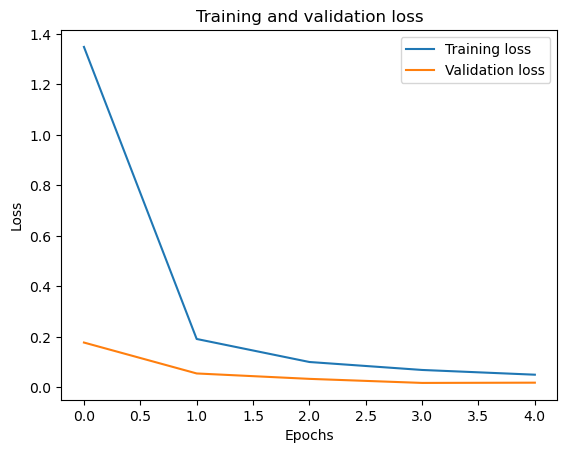

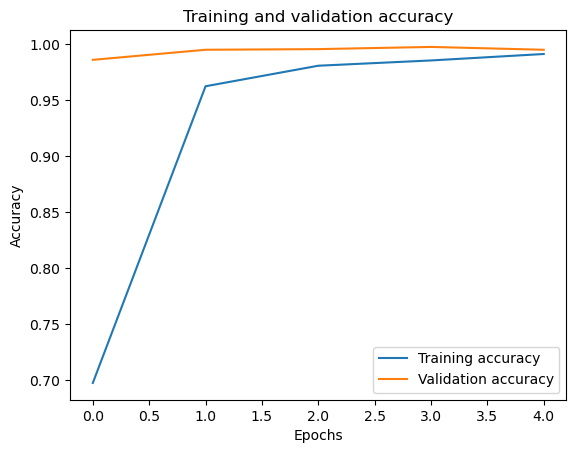

In [185]:
import matplotlib.pyplot as plt

# Plot the training and validation loss vs epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy vs epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()







